## Генератор случайных чисел

![img](https://cdn.ablebits.com/_img-blog/random-generator/random-generator.png)

О подходах к понятию случайности: 
Н.К. Верещагин, В.А. Успенский, А. Шень. Колмогоровская сложность и алгоритмическая случайность. 
https://www.mccme.ru/free-books/shen/kolmbook.pdf

В основе стандартных ГСЧ лежит **алгоритм**. Как следствие, получаем детерминированную последовательность. Примеры алгоримтов https://en.wikipedia.org/wiki/List_of_random_number_generators.

"Настоящие" ГСЧ используют источники случайности, например https://www.random.org/.

## Генерация равномерного распределения

Для генерации равномерного распределения часто используют Linear congruential generator (LCG). Например, вызов```rand()``` в C/C++.

Алгоритм LCG генерирует последовательность:
$$ z_{i+1} = (az_i + c) \mod m $$

Значение $z_0$ называется *seed*, стартуя с одного и того же $z_0$, будем получать одну и ту же последовательность чисел.

Пример LCG:

In [2]:
def rng(m=2**32, a=1103515245, c=12345):
    rng.current = (a * rng.current + c) % m
    return rng.current / m

# setting the seed
rng.current = 1

Создадим последовательность из 10 элементов:

In [3]:
[rng() for i in range(10)]

[0.25693503906950355,
 0.5878706516232342,
 0.15432575810700655,
 0.767266943352297,
 0.9738139626570046,
 0.5858681506942958,
 0.8511155843734741,
 0.6132153405342251,
 0.7473867232911289,
 0.06236015981994569]

Параметры $m$, $a$ и $c$ нужно выбирать аккуратно. Случайный выбор констант может привести к неожиданным результатам:

In [4]:
def rng(m=97, a=5, c=0):
    rng.current = (a * rng.current + c) % m
    return rng.current / m
rng.current = 7

random = [rng() for i in range(1000)]
print("This sequence looks as random:")
random[:10]

This sequence looks as random:


[0.36082474226804123,
 0.8041237113402062,
 0.020618556701030927,
 0.10309278350515463,
 0.5154639175257731,
 0.5773195876288659,
 0.8865979381443299,
 0.4329896907216495,
 0.16494845360824742,
 0.8247422680412371]

Гистограмма похожа на равномерное распределение

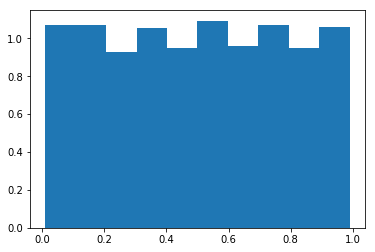

In [6]:
import matplotlib.pyplot as plt
plt.hist(random, density=True)
plt.show()

Но вот что происходит в 2D. Точки явно не расположены случайно:

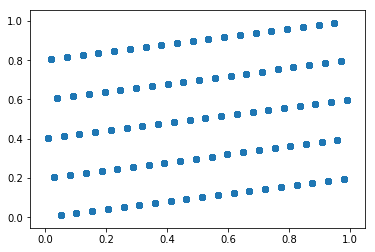

In [7]:
plt.scatter(random[1:], random[:-1])
plt.show()

Более удачный выбор констант хорошо распределяет точки:

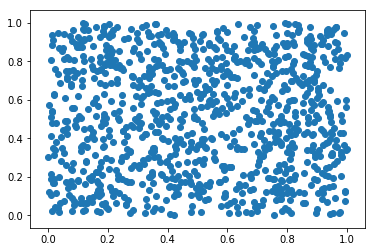

In [8]:
def rng(m=2**32, a=1103515245, c=12345):
    rng.current = (a * rng.current + c) % m
    return rng.current / m
rng.current = 1

random = [rng() for i in range(1000)]
plt.scatter(random[1:], random[:-1])
plt.show()

Примеры других тестов на случайность: [Diehard tests](https://en.wikipedia.org/wiki/Diehard_tests).

## Моделирование распределений

Как с помощью генератора равномерного распределеия на (0, 1) моделировать выборку из распределеия $F$?

### Inverse transform method

В основе *inverse transform method* лежит следующее набюдение:  если $\xi$ равномерна на $[0,1]$, тогда величина $F^{-1}(\xi)$ распределена по закону $F$. 

Докажите это утверждение. Для каких $F$ оно верно?

### Задача
Смоделировать выборку размера 1000 из распределения $Exp(\lambda)$ методом inverse transform. Нарисуйте выборочную гистограмму и истинную плотность распределения.

<Figure size 432x288 with 0 Axes>

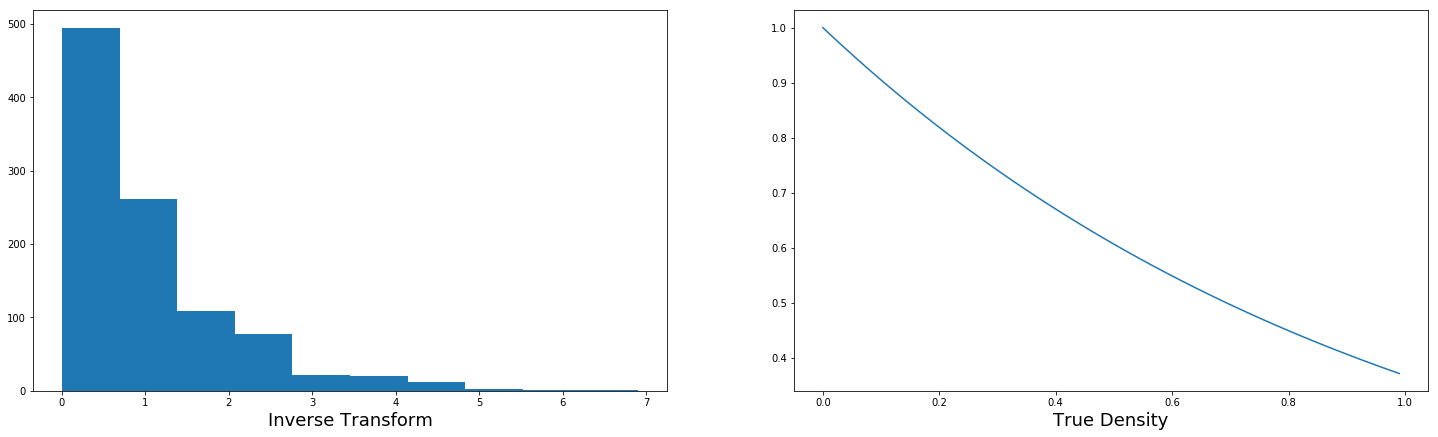

In [10]:
# Solution here
import math
import numpy as np

lam = 1.0
def ExpInv(y):
    return math.log(1 - y) / (-lam)
def Exp(x):
    return math.exp((-1) * lam * x) * lam

plt.figure()
plt.figure(figsize=(25,7))

plt.subplot(121)
y_inv = [ExpInv(rng()) for i in range(1000)]
p1 = plt.hist(y_inv, alpha = 1.0)
plt.xlabel('Inverse Transform', fontsize = 18)

plt.subplot(122)
x_p2 = np.arange(0.0, 1.0, 0.01)
y_p2 = [Exp(i) for i in x_p2]
p2 = plt.plot(x_p2, y_p2, alpha = 1.0)
plt.xlabel('True Density', fontsize = 18)

plt.show()

### Rejection sampling (Accept-reject method)

Идея метода: моделировать выборку из распределения, для которого это умеем делать, и отбирать точки, которые попали под график целевого распределения.
![img](https://colcarroll.github.io/hamiltonian_monte_carlo_talk/images/bayes_talk.015.png)



### Задача
Строго обоснуйте метод rejection sampling. Смоделируйте выборку размера 100 из распределения, заданного ниже, используя генератор равномерного распределения.

1 :  0.09293003072962165 

2 :  0.02845711223781109 

3 :  0.059050109516829256 

4 :  0.00986537840217352 

5 :  0.02739870073273778 

6 :  0.22119915038347246 

7 :  0.010660146083682777 

8 :  0.11701152427121997 

9 :  0.07397990003228187 

10 :  0.01194193260744214 

11 :  0.07570536360144615 

12 :  0.06246508220210672 

13 :  0.04001862443983555 

14 :  0.09210206149145961 

15 :  0.006503001693636179 

16 :  0.004345950111746788 

17 :  0.20232318388298154 

18 :  0.014022452384233476 

19 :  0.07074251230806113 

20 :  0.0015467352233827115 

21 :  0.02181759150698781 

22 :  0.037144722230732445 

23 :  0.05290480582043529 

24 :  0.2498632692731917 

25 :  0.008508249931037427 

26 :  0.036109016276896 

27 :  0.032077659480273725 

28 :  0.09423767887055874 

29 :  0.044377555884420876 

30 :  0.23411526093259455 

31 :  0.12239742213860155 

32 :  0.10493496479466558 

33 :  0.005953631643205882 

34 :  0.08139324020594359 

35 :  0.006293606199324131 

36 :  0.02330643767

<Figure size 432x288 with 0 Axes>

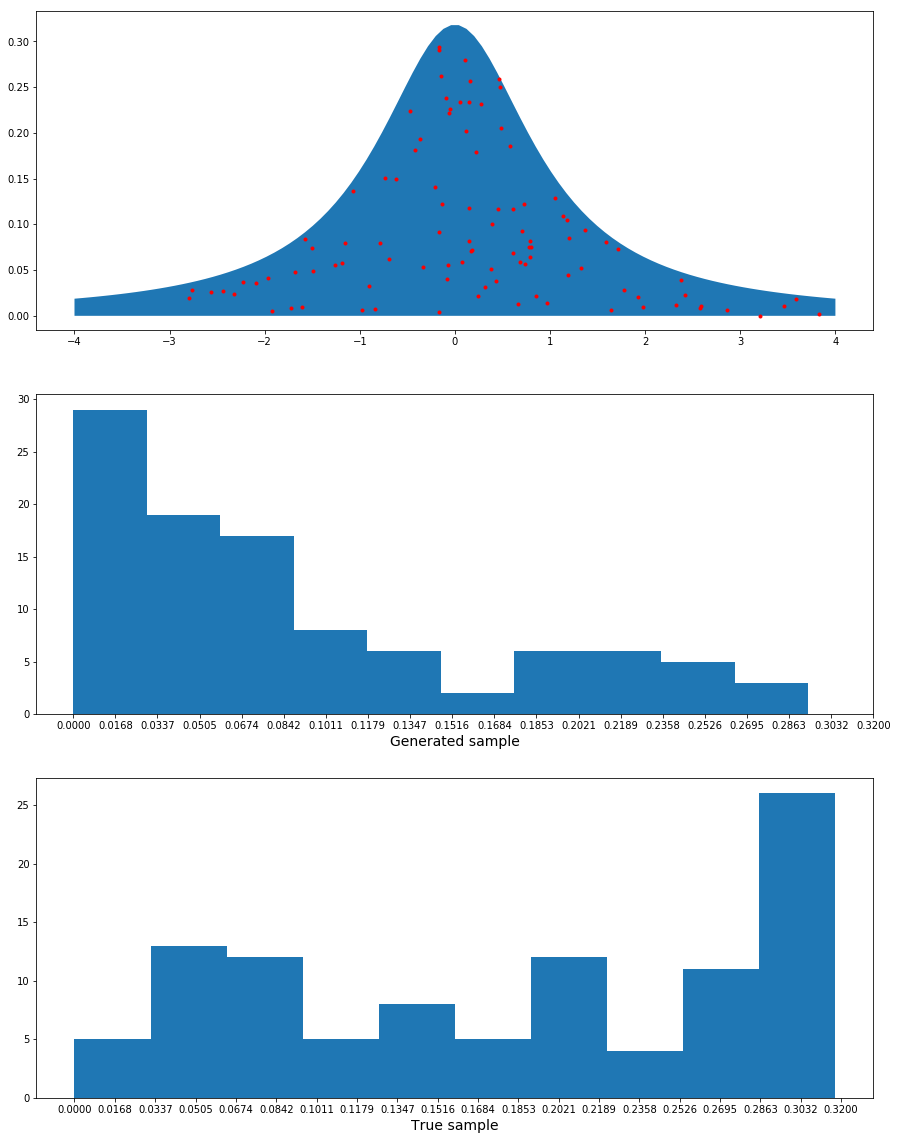

In [29]:
from scipy import stats
import numpy as np
dist = stats.cauchy()
x = np.linspace(-4, 4, 100)

plt.figure()
plt.figure(figsize=(15,20))

plt.subplot(311)
plt.fill_between(x, 0, dist.pdf(x)) #needs to be normalized!

def rng(m=2**32, a=1103515245, c=12345):
    rng.current = (a * rng.current + c) % m
    return rng.current / m
rng.current = 1
countUni = 1000
countCau = 0
#Создадим массив для нашей выборки для того, чтобы нарисовать гистограмму и сравнить её с реальной плотностью
samp_gen = np.empty(101)
#Создадим массив для истинной выборки
samp_true = np.empty(101)
#Генерируем равномерное распределение на отрезке от -4 до 4
rngx = [(rng() * 8.0 - 4.0) for i in range(countUni)]
#Генерируем равномерное распределение на отрезке от 0 до 0.4
rngy = [(rng() * 0.4) for i in range(countUni)]
#Теперь у нас есть тысяча равномерно распределённых точек в прямоугольнике [-4, 4] x [0, 1]
#Выберем из них только те сто, которые попали под нужный нам график
for i in range(countUni):
    if (rngy[i] < dist.pdf(rngx[i])):
        countCau += 1
        if (countCau <= 100):
            plt.plot(rngx[i], rngy[i], 'r.', alpha = 1.0)
            print(countCau, ": ", rngy[i], "\n")
            samp_gen[countCau] = rngy[i]
            samp_true[countCau] = dist.pdf(rngx[i])
        else:
            i = countUni + 1
#Рисуем гистограмму полученной выборки
plt.subplot(312)
plt.hist(samp_gen)
plt.xlabel('Generated sample', fontsize = 14)
plt.xticks(np.linspace(0, 0.32, 20))

plt.subplot(313)
plt.hist(samp_true)
plt.xlabel('True sample', fontsize = 14)
plt.xticks(np.linspace(0, 0.32, 20)) 

plt.show()



In [9]:
# Solution here

##  Coordinate transformation

### Задача
Смоделируйте выбору размера 100, равномерно распределенную внутри заданного треугольника. Для этого моделируйте точки внутри единичного квадрата и с помощию подходящего преобразования координат, переведите их внутрь треугольника. Нанесите полученную выборку на рисунок.

<Figure size 432x288 with 0 Axes>

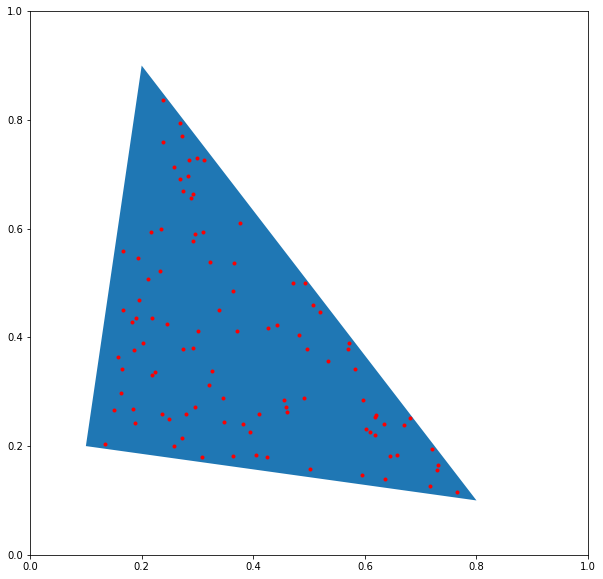

In [13]:
import matplotlib
from matplotlib.patches import Polygon
from matplotlib.collections import PatchCollection

plt.figure()
plt.figure(figsize=(10,10))

def rng(m=2**32, a=1103515245, c=12345):
    rng.current = (a * rng.current + c) % m
    return rng.current / m
rng.current = 1
countUni = 1000
countTre = 0

#Генерируем равномерное распределение на отрезке от 0 до 1
rngx = [rng() for i in range(countUni)]
#Теперь у нас есть тысяча равномерно распределённых точек в прямоугольнике [0, 1] x [0, 1]
#Переведём систему координат в точку (1, 2), а в качестве базисных векторов возьмём боковые стороны треугольника,
#выходящие из этой точки. Напишем обратную замену СК и применим её к равномено выбранным точкам из единичного квадрата
#базисные вектора: (1, 0) -> (7, -1), а (0, 1) -> (1, 7)
#замена, таким образом имееет вид: | x | = | 0.7  0.1 || x* | + | 0.1 |
#                                  | y | = |-0.1  0.7 || y* | + | 0.2 |
#где x*, y* - новые координаты, а x, y - старые
#таким образом этот треугольник в новой СК является симплексом, так как 
#его боковые стороны есть единичные вектора, лежащие на осях, а вершина лежит в центре координат
#нам нужно отобрать сто точек из этого треугольника и перевести их обратно к исходыной СК
#прямая, проходящая через точки (1, 0) и (0, 1) имеет уравнение x + y = 1,
#значит область под ней задаётся неравенством x + y < 1
for i in range(countUni):
    if (rngx[i] + rngx[countUni - i - 1] < 1):
        if (countTre < 100):
            countTre += 1
            xtemp = 0.7 * rngx[i] + 0.1 * rngx[countUni - i - 1] + 0.1
            ytemp = -0.1 * rngx[i] + 0.7 * rngx[countUni - i - 1] + 0.2
            p2 = plt.plot(xtemp, ytemp, 'r.', alpha = 1.0)
        else:
            i = countUni + 1

polygon = Polygon(0.1 * np.array([[1, 2], [2, 9], [8, 1]]), True)
p1 = plt.gca().add_collection(PatchCollection([polygon]))
plt.axis([0, 1, 0, 1])
plt.show()

In [11]:
# Solution here

### Задача
Смоделируйте выборку размера 500, равномерно распределенную внутри единичной окружности, не используя метод отбора. Нанесите полученную выборку на рисунок.

<Figure size 432x288 with 0 Axes>

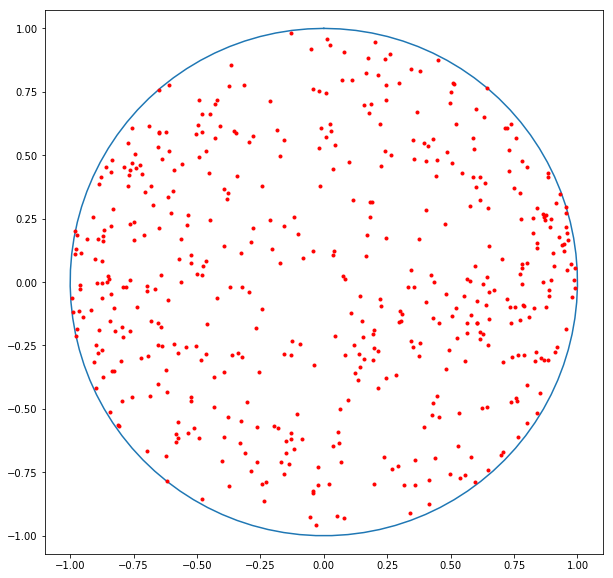

In [35]:
from matplotlib.patches import Circle

plt.figure()
plt.figure(figsize=(10,10))

def rng(m=2**32, a=1103515245, c=12345):
    rng.current = (a * rng.current + c) % m
    return rng.current / m
rng.current = 1
countUni = 500

t = np.linspace(0, 2 * np.pi, 100)
p1 = plt.plot(np.sin(t), np.cos(t))
plt.axis('equal')

#Генерируем равномерное распределение на отрезке от -1 до 1 - это положение точки икс
rngx = [(rng() * 2 - 1) for i in range(countUni)]
#Создаём функцию, генерирующую случайную точку на отрезке от -sqrt(1 - x^2) до +sqrt(1 - x^2) - это наш игрэк
def rngR(x):
    t = math.sqrt(1 - x**2)
    return (rng() * 2 * t - t)
for i in range(countUni):
    temp  = rngR(rngx[i])
    p2 = plt.plot(rngx[i], temp, 'r.', alpha = 1.0)

plt.show()

In [13]:
# Solution here

## Random normal generator

### Задача

Докажите, что приведенный ниже алгоритм моделирует пары независимых N(0,1) величин. Преобразуйте алгоритм, чтобы исключить обращение к функциям ```np.sin``` и ```np.cos```.

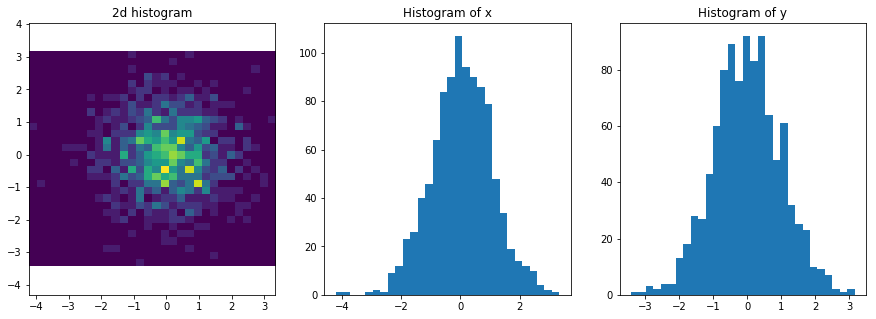

In [38]:
n = 1000
u1, u2 = np.random.rand(2, n)
r = np.sqrt(-2 * np.log(u1))
theta = 2 * np.pi * u2
x = r * np.cos(theta)
y = r * np.sin(theta)
fig, ax = plt.subplots(1, 3, figsize=(15, 5))
ax[0].hist2d(x, y, bins=30)
ax[0].axis('equal')
ax[1].hist(x, bins=30)
ax[2].hist(y, bins=30)
ax[0].set_title("2d histogram")
ax[1].set_title("Histogram of x")
ax[2].set_title("Histogram of y")
plt.show()

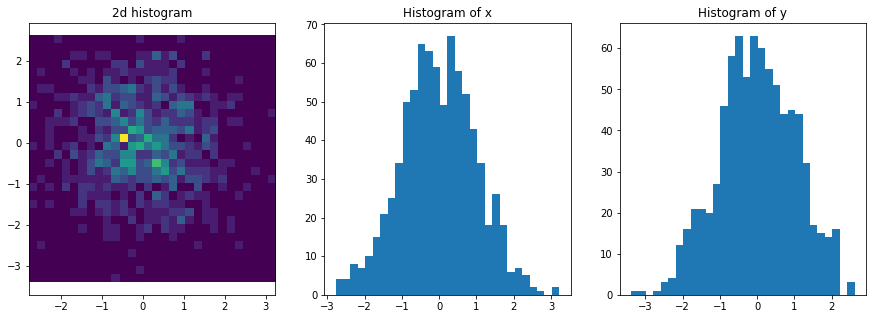

In [39]:
# Solution here
#
# Д-во
#
# Существует распределение хи-квадраnт, которое представляет собой распределение суммы квадратов k независимых 
# нормальных случайных величин. И в случае, когда k = 2, это распределение является экспоненциальным.
# Это означает, что если у точки в прямоугольной системе координат будут случайные координаты X и Y, распределенные 
# нормально, то после перевода этих координат в полярную систему (r, θ) квадрат радиуса 
# (расстояния от начала координат до точки) будет распределен по экспоненциальному закону, 
# так как квадрат радиуса — это сумма квадратов координат (по закону Пифагора). 
# Так как она равноценна во всех направлениях, угол θ будет иметь равномерное распределение в диапазоне от 0 до 2π. 
# Справедливо и обратное: если задать точку в полярной системе координат с помощью двух независимых случайных 
# величин (угла, распределенного равномерно, и радиуса, распределенного экспоненциально), то прямоугольные 
# координаты этой точки будут являться независимыми нормальными случайными величинами. А экспоненциальное 
# распределение из равномерного получить уже гораздо проще, с помощью того же метода обратного преобразования. 
# Таким образом имеем формулы: x = r*cos(θ) y = r*sin(θ) (@@_формулы (1)_@@)
# Для получения r и θ нужно сгенерировать две равномерно распределенные на отрезке (0, 1) случайные величины 
# (назовем их u1 и u2), распределение одной из которых (допустим u1) необходимо преобразовать в экспоненциальное 
# для получения радиуса. 
# Функция экспоненциального распределения выглядит следующим образом: f(x) = 1 - exp(-λx)
# Обратная к ней функция имеет вид: f(x) = -ln(1 - x) / λ
# Так как равномерное распределение симметрично, то аналогичное преобразование будет работать 
# и с функцией: f(x) = -ln(x) / λ
# Из формулы распределения хи-квадрат следует, что λ = 0,5. Подставим в эту функцию λ, v и получим квадрат радиуса, 
# а затем и сам радиус:r^2 = -2ln(u1) r = sqrt(-2ln(u1))
# Угол получим, растянув единичный отрезок до 2π: θ = 2π(u2)
# Теперь подставим r и θ в (@@_формулы (1)_@@) и получим:
# x = sqrt(-2ln(u1)) * cos( 2π(u2) )
# y = sqrt(-2ln(u1)) * sin( 2π(u2) )
# Эти формулы уже готовы к использованию. X и Y будут независимы и распределены нормально с дисперсией 1 
# и математическим ожиданием 0. Чтобы получить распределение с другими характеристиками достаточно умножить 
# результат функции на среднеквадратическое отклонение и прибавить математическое ожидание.
#
#
# Но есть возможность избавиться от тригонометрических функций, задав угол не прямо, а косвенно через 
# прямоугольные координаты случайной точки в круге. Тогда через эти координаты можно будет вычислить длину 
# радиус-вектора, а потом найти косинус и синус, поделив на нее x и y соответственно.
# Выберем случайную точку из равномерно распределенных в круге единичного радиуса
# и обозначим квадрат длины радиус-вектора этой точки буквой s:
# Выбор осуществляется заданием случайных прямоугольных координат x и y, равномерно распределенных 
# в интервале (-1, 1), и отбрасыванием точек, которые не принадлежат кругу, а также центральной точки, 
# в которой угол радиус-вектора не определен. То есть должно выполниться условие 0 < s < 1. 
# Тогда, как и в случае с Гауссовским распределением на плоскости, угол θ будет распределен равномерно. 
# Это очевидно — количество точек в каждом направлении одинаково, значит каждый угол равновероятен. 
# Но есть и менее очевидный факт — s тоже будет иметь равномерное распределение. 
# Полученные s и θ будут независимы друг от друга. Поэтому мы можем воспользоваться значением s для получения 
# экспоненциального распределения, не генерируя третью случайную величину. Подставим теперь s в формулы (2) 
# вместо u1, а вместо тригонометрических функций — их расчет делением координаты на длину радиус-вектора, 
# которая в данном случае является корнем из s:

# Генерируем две равномерные случайные величины на отрезке от -1 до 1
n = 1000
u1, u2 = np.random.rand(2, n) * 2 - 1
# Вычисляем величину s с учётом того, что её значение должно быть от 0 до 1 и корректируем величины u1 и u2
s = u1 * u1 + u2 * u2
mask = s < 1

# Новым способом вычисляем радиус
r = np.sqrt(-2 * np.log(s[mask]))
# Вычисляем случайные величины
x = r * (u1[mask] / np.sqrt(s[mask]))
y = r * (u2[mask] / np.sqrt(s[mask]))

fig, ax = plt.subplots(1, 3, figsize=(15, 5))
ax[0].hist2d(x, y, bins=30)
ax[0].axis('equal')
ax[1].hist(x, bins=30)
ax[2].hist(y, bins=30)
ax[0].set_title("2d histogram")
ax[1].set_title("Histogram of x")
ax[2].set_title("Histogram of y")
plt.show()

## Markov Chain Monte Carlo (MCMC)

Алгоритм приближенного моделирование случаных величин из заданного распредедения. 

Идея:
* построить эргодическую цепь Маркова, для которой стационарное распределение - это в точности наше заданное распределение

* инициировать блуждание по цепи Маркова из некоторого начального состояния и дождаться, когда распределение сойдется в стационарному. С этого момента состояния цепи Маркова можно считать выборкой из желаемого распределения.

Вот как это работает https://chi-feng.github.io/mcmc-demo/app.html#RandomWalkMH,multimodal

Алгоритм:
* пусть $\pi$ - заданное распределение (не обязательно нормированное к 1) на множестве $\Omega$, из которохо хотим моделировать выборку
* пусть $Q = (q_{i,j})$ - матрица переходных вероятностей (переходная плотность) произвольной цепи Маркова с состояниями из $\Omega$
* выберем произвольное $X_0$ из $\Omega$
* для текущего $X_n$ смоделируем значение $Z_{n+1}$ из распределения $q_{X_n, \cdot}$
* смоделируем случайную величину $\alpha$ из распределения Бернулли с вероятностью успеха
$$
p = \min ( 1, \frac{\pi_j q_{j,i}}{\pi_i q_{i,j}} )
$$
* если $\alpha$ = 1, то $X_{n+1} = Z_{n+1}$, иначе $X_{n+1} = X_{n}$.

Обоснование метода можно почитать здесь http://probability.ca/jeff/ftpdir/johannes.pdf

Некоторые способы задания $q$:
* Metropolis algorithm: $q_{i,j} = q_{j,i}$
* Random walk Metropolis-Hastings: $q_{i,j} = q(j - i)$

В качетве примера рассмотрим выборку из модели $x|\mu \sim N(x;\mu,1)$, зададим априорное распределение параметров в виде  $\mu \sim N(0,1)$, и решим задачу нахождения апостериорного распределения параметров.

Задание выборки размера 20 для истинного значения $\mu=0$:

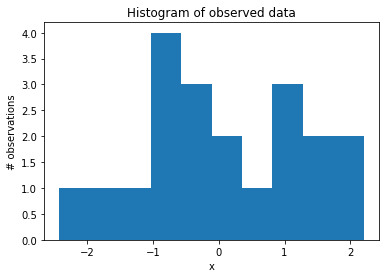

In [42]:
import numpy as np

np.random.seed(123)
data = np.random.randn(20)

plt.hist(data)
plt.title('Histogram of observed data')
plt.xlabel('x'), plt.ylabel('# observations')
plt.show()

Знание о сопряженных распределениях (https://en.wikipedia.org/wiki/Conjugate_prior) позволяет получить параметры апостериорного распределения аналитически:

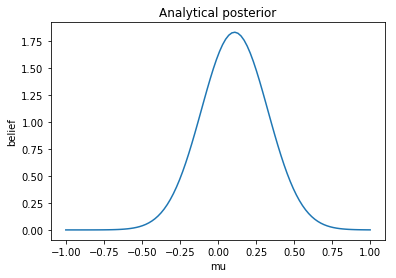

In [41]:
from scipy.stats import norm

mu_prior_mu = 0
mu_prior_sd = 1

def calc_posterior_analytical(data, x, mu_0, sigma_0):
    sigma = 1.
    n = len(data)
    mu_post = (mu_0 / sigma_0**2 + data.sum() / sigma**2) / (1. / sigma_0**2 + n / sigma**2)
    sigma_post = (1. / sigma_0**2 + n / sigma**2)**-1
    return norm(mu_post, np.sqrt(sigma_post)).pdf(x)

ax = plt.subplot()
x = np.linspace(-1, 1, 100)
posterior_analytical = calc_posterior_analytical(data, x, mu_prior_mu, mu_prior_sd)
plt.plot(x, posterior_analytical)
plt.xlabel('mu'), plt.ylabel('belief'), plt.title('Analytical posterior')
plt.show()

Попробуем приблизиться к рассчитанному аналитически апостериорному распределению с помощью алгоритма МСМС. 

Зададим начальное состояние цепи Маркова:

In [43]:
mu_current = 1

Зададим переходную плотность в виде N(mu_current, proposal_width) и сделаем пробный шаг:

In [44]:
proposal_width = .1
mu_proposal = norm(mu_current, proposal_width).rvs()

Найдем отношение правбоподобий в текущей и пробной точке:

In [45]:
likelihood_current = norm(mu_current, 1).pdf(data).prod()
likelihood_proposal = norm(mu_proposal, 1).pdf(data).prod()

# Compute prior probability of current and proposed mu
prior_current = norm(mu_prior_mu, mu_prior_sd).pdf(mu_current)
prior_proposal = norm(mu_prior_mu, mu_prior_sd).pdf(mu_proposal)

p_current = likelihood_current * prior_current
p_proposal = likelihood_proposal * prior_proposal

Определим параметр для вероятности перехода в пробную точку:

In [46]:
p_accept = min(1, p_proposal / p_current)

Моделируем случайную величину из распределения Бернулли и принимаем решение о переходе в пробную точку (или остаемся в текущем состоянии)

In [47]:
accept = np.random.rand() < p_accept

if accept:
    mu_current = mu_proposal

### Задача

Смоделируйте достаточное число переходов по цепи Маркова, после которого установится стационарное распределение, и сравните выборку из стационарного распределения с целевым распределением. Если теория не подведет, то выборочное распределение должно приближать целевое. Измените параметр ```proposal_width``` и проверьте как это влияет на скорость сходимости. Нарисуйте траекторию переходов по цепи Маркова для разных значений параметров.

<Figure size 432x288 with 0 Axes>

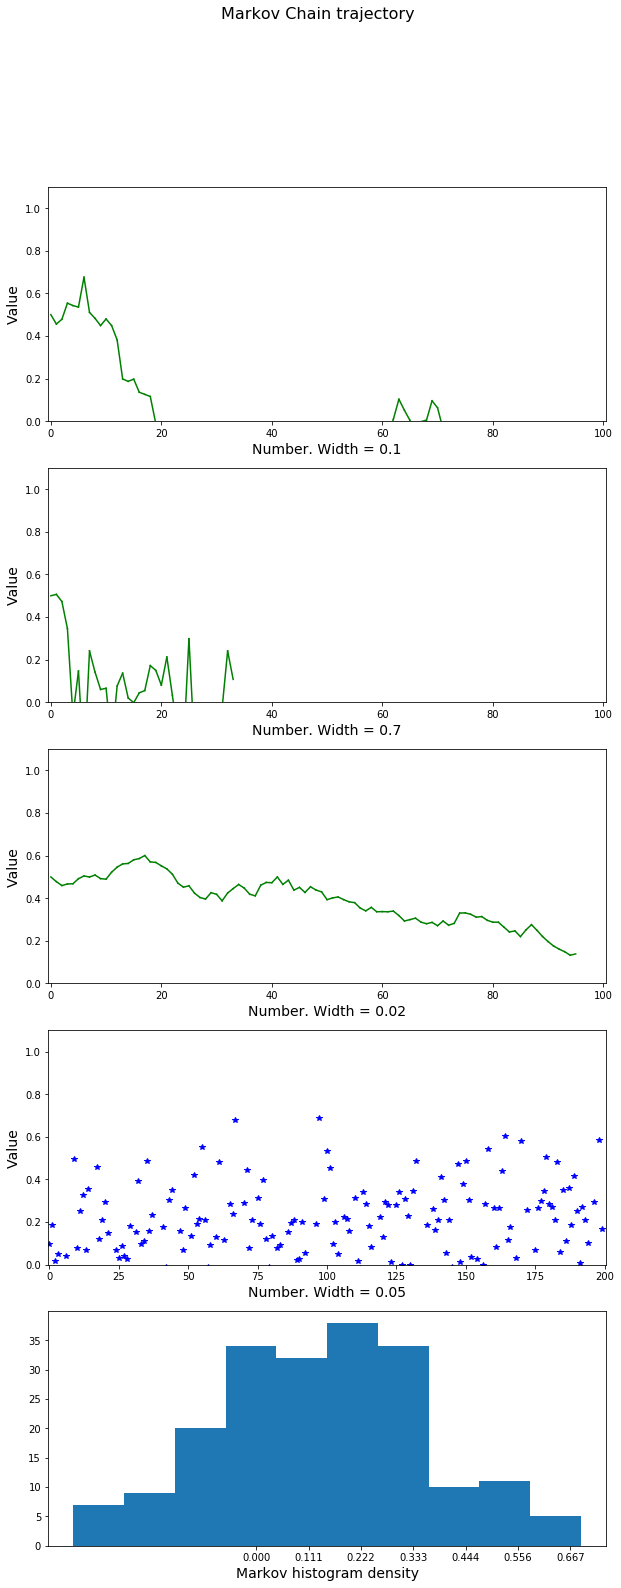

In [64]:
# Solution here
#Создадим вспомогательный массив для отображения траеторий линиями
tempx = np.empty(2)
tempy = np.empty(2)

# Создадим функцию движения по цепи Маркова с отрисовкой
def MarkovChainP(n, mu_current, proposal_width, p):
    l = 0
    mu_prev = mu_current
    for i in np.arange(n):
        mu_proposal = norm(mu_current, proposal_width).rvs()
        likelihood_current = norm(mu_current, 1).pdf(data).prod()
        likelihood_proposal = norm(mu_proposal, 1).pdf(data).prod()

        # Compute prior probability of current and proposed mu
        prior_current = norm(mu_prior_mu, mu_prior_sd).pdf(mu_current)
        prior_proposal = norm(mu_prior_mu, mu_prior_sd).pdf(mu_proposal)

        p_current = likelihood_current * prior_current
        p_proposal = likelihood_proposal * prior_proposal
        p_accept = min(1, p_proposal / p_current)

        accept = np.random.rand() < p_accept

        if accept:
            mu_current = mu_proposal
            tempx[0] = l
            tempy[0] = mu_prev
            tempx[1] = l + 1
            tempy[1] = mu_current
            p = plt.plot(tempx, tempy, "g-")
            l += 1
            mu_prev = mu_current
    return mu_current

# Создадим функцию движения по цепи Маркова без отрисовки
def MarkovChain(n, mu_current, proposal_width):
    for i in np.arange(n):
        mu_proposal = norm(mu_current, proposal_width).rvs()
        likelihood_current = norm(mu_current, 1).pdf(data).prod()
        likelihood_proposal = norm(mu_proposal, 1).pdf(data).prod()

        # Compute prior probability of current and proposed mu
        prior_current = norm(mu_prior_mu, mu_prior_sd).pdf(mu_current)
        prior_proposal = norm(mu_prior_mu, mu_prior_sd).pdf(mu_proposal)

        p_current = likelihood_current * prior_current
        p_proposal = likelihood_proposal * prior_proposal
        p_accept = min(1, p_proposal / p_current)

        accept = np.random.rand() < p_accept

        if accept:
            mu_current = mu_proposal
    return mu_current

# Зададим размер цепи 
n = 100
# Нарисуем траектории переходов в цепи Маркова для разных значений параметра
plt.figure(2)
plt.figure(figsize = (10,25))
plt.suptitle('Markov Chain trajectory', fontsize = 16)

MarkovChainP(n, 0.5, 0.1, plt.subplot(511))
plt.xlabel('Number. Width = 0.1', fontsize = 14)
plt.ylabel('Value', fontsize = 14)
plt.axis([-0.5, n + 0.5, 0, 1.1])

MarkovChainP(n, 0.5, 0.7, plt.subplot(512))
plt.xlabel('Number. Width = 0.7', fontsize = 14)
plt.ylabel('Value', fontsize = 14)
plt.axis([-0.5, n + 0.5, 0, 1.1])

MarkovChainP(n, 0.5, 0.02, plt.subplot(513))
plt.xlabel('Number. Width = 0.02', fontsize = 14)
plt.ylabel('Value', fontsize = 14)
plt.axis([-0.5, n + 0.5, 0, 1.1])

# Зададим шаг
proposal_width = 0.05
# Инициализируем будущую выборку
m = 200
X = np.empty(m)

for l in np.arange(m):
    # Зададим начальную точку, как случайное число от 0 до 1
    mu_current = np.random.rand()
    # Пройдёмся по цепи и выберем значения после установления стационарного распределения
    X[l] = MarkovChain(n, mu_current, proposal_width)
# Нарисуем нашу выборку
plt.subplot(514)
plt.plot(np.arange(m), X, "b*")
plt.xlabel('Number. Width = 0.05', fontsize = 14)
plt.ylabel('Value', fontsize = 14)
plt.axis([-0.5, m + 0.5, 0, 1.1])

plt.subplot(515)
plt.xticks(np.linspace(0, 1, 10)) 
plt.xlabel('Markov histogram density', fontsize = 14)
plt.hist(X)

plt.show()

### Submit to https://goo.gl/forms/aszSXdC53VV19kwx2